# Dynamic Pricing for Urban Parking Lots
# Notebook 1: Exploratory Data Analysis (EDA)

This notebook performs comprehensive exploratory data analysis on the parking dataset
to understand patterns, seasonality, and relationships between features.

# 1. IMPORT LIBRARIES

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")


Libraries imported successfully!


# 2. LOAD DATASET

In [5]:
# Load the parking dataset
df = pd.read_csv('dataset.csv')

print(f"Dataset Shape: {df.shape}")
print(f"\nFirst 5 rows:")
print(df.head())

print(f"\nDataset Info:")
print(df.info())

print(f"\nBasic Statistics:")
print(df.describe())


Dataset Shape: (18368, 12)

First 5 rows:
   ID SystemCodeNumber  Capacity   Latitude  Longitude  Occupancy VehicleType  \
0   0      BHMBCCMKT01       577  26.144536  91.736172         61         car   
1   1      BHMBCCMKT01       577  26.144536  91.736172         64         car   
2   2      BHMBCCMKT01       577  26.144536  91.736172         80         car   
3   3      BHMBCCMKT01       577  26.144536  91.736172        107         car   
4   4      BHMBCCMKT01       577  26.144536  91.736172        150        bike   

  TrafficConditionNearby  QueueLength  IsSpecialDay LastUpdatedDate  \
0                    low            1             0      04-10-2016   
1                    low            1             0      04-10-2016   
2                    low            2             0      04-10-2016   
3                    low            2             0      04-10-2016   
4                    low            2             0      04-10-2016   

  LastUpdatedTime  
0        07:59:00  
1   

# 3. DATA PREPROCESSING

In [6]:
# Create a copy for processing
data = df.copy()


In [7]:
# Convert date and time columns to datetime
data['DateTime'] = pd.to_datetime(
    data['LastUpdatedDate'] + ' ' + data['LastUpdatedTime'],
    format='%d-%m-%Y %H:%M:%S'
)


In [8]:
# Extract temporal features
data['Date'] = data['DateTime'].dt.date
data['Time'] = data['DateTime'].dt.time
data['Hour'] = data['DateTime'].dt.hour
data['Minute'] = data['DateTime'].dt.minute
data['DayOfWeek'] = data['DateTime'].dt.dayofweek  # 0=Monday, 6=Sunday
data['DayName'] = data['DateTime'].dt.day_name()
data['WeekOfYear'] = data['DateTime'].dt.isocalendar().week

In [9]:
# Calculate occupancy rate (key metric)
data['OccupancyRate'] = (data['Occupancy'] / data['Capacity']) * 100


In [10]:
# Encode categorical variables numerically for analysis
vehicle_type_map = {'cycle': 1, 'bike': 2, 'car': 3, 'truck': 4}
traffic_map = {'low': 1, 'average': 2, 'high': 3}

data['VehicleType_Encoded'] = data['VehicleType'].map(vehicle_type_map)
data['TrafficLevel_Encoded'] = data['TrafficConditionNearby'].map(traffic_map)

print("\n" + "="*70)
print("DATA PREPROCESSING COMPLETED")
print("="*70)
print(f"\nNew Features Created:")
print(f"- DateTime: Combined timestamp")
print(f"- Hour, DayOfWeek, WeekOfYear: Temporal features")
print(f"- OccupancyRate: Occupancy percentage")
print(f"- Encoded categorical variables")

print(f"\nProcessed Dataset Shape: {data.shape}")
print(f"\nSample of processed data:")
print(data[['SystemCodeNumber', 'DateTime', 'Hour', 'OccupancyRate', 
           'VehicleType', 'TrafficConditionNearby', 'QueueLength']].head(10))


DATA PREPROCESSING COMPLETED

New Features Created:
- DateTime: Combined timestamp
- Hour, DayOfWeek, WeekOfYear: Temporal features
- OccupancyRate: Occupancy percentage
- Encoded categorical variables

Processed Dataset Shape: (18368, 23)

Sample of processed data:
  SystemCodeNumber            DateTime  Hour  OccupancyRate VehicleType  \
0      BHMBCCMKT01 2016-10-04 07:59:00     7      10.571924         car   
1      BHMBCCMKT01 2016-10-04 08:25:00     8      11.091854         car   
2      BHMBCCMKT01 2016-10-04 08:59:00     8      13.864818         car   
3      BHMBCCMKT01 2016-10-04 09:32:00     9      18.544194         car   
4      BHMBCCMKT01 2016-10-04 09:59:00     9      25.996534        bike   
5      BHMBCCMKT01 2016-10-04 10:26:00    10      30.675910         car   
6      BHMBCCMKT01 2016-10-04 10:59:00    10      37.954939       truck   
7      BHMBCCMKT01 2016-10-04 11:25:00    11      42.807626         car   
8      BHMBCCMKT01 2016-10-04 11:59:00    11      44.8873

# 4. DATA QUALITY CHECKS

In [12]:
print("\n" + "="*70)
print("DATA QUALITY ANALYSIS")
print("="*70)


# Check for missing values
print("\nMissing Values:")
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found!")

# Check for duplicates
duplicates = data.duplicated().sum()
print(f"\nDuplicate Rows: {duplicates}")

# Check data ranges
print("\nData Range Validation:")
print(f"- Occupancy > Capacity: {(data['Occupancy'] > data['Capacity']).sum()} cases")
print(f"- Negative Queue Length: {(data['QueueLength'] < 0).sum()} cases")
print(f"- Occupancy Rate Range: {data['OccupancyRate'].min():.2f}% to {data['OccupancyRate'].max():.2f}%")

# Parking lot information
print("\n" + "="*70)
print("PARKING LOT OVERVIEW")
print("="*70)

parking_summary = data.groupby('SystemCodeNumber').agg({
    'Capacity': 'first',
    'Latitude': 'first',
    'Longitude': 'first',
    'Occupancy': ['mean', 'max'],
    'OccupancyRate': 'mean',
    'QueueLength': 'mean'
}).round(2)

print(f"\nTotal Unique Parking Lots: {data['SystemCodeNumber'].nunique()}")
print(f"\nParking Lot Summary:")
print(parking_summary)


DATA QUALITY ANALYSIS

Missing Values:
No missing values found!

Duplicate Rows: 0

Data Range Validation:
- Occupancy > Capacity: 241 cases
- Negative Queue Length: 0 cases
- Occupancy Rate Range: 0.35% to 104.13%

PARKING LOT OVERVIEW

Total Unique Parking Lots: 14

Parking Lot Summary:
                 Capacity Latitude Longitude Occupancy       OccupancyRate  \
                    first    first     first      mean   max          mean   
SystemCodeNumber                                                             
BHMBCCMKT01           577    26.14     91.74    162.03   573         28.08   
BHMBCCTHL01           387    26.14     91.74    288.36   403         74.51   
BHMEURBRD01           470    26.15     91.74    302.49   470         64.36   
BHMMBMMBX01           687    20.00     78.00    477.30   688         69.48   
BHMNCPHST01          1200    26.14     91.73    557.69   954         46.47   
BHMNCPNST01           485    26.14     91.73    285.94   467         58.96   
Broad S

# 5. EXPLORATORY DATA ANALYSIS - VISUALIZATIONS


GENERATING VISUALIZATIONS


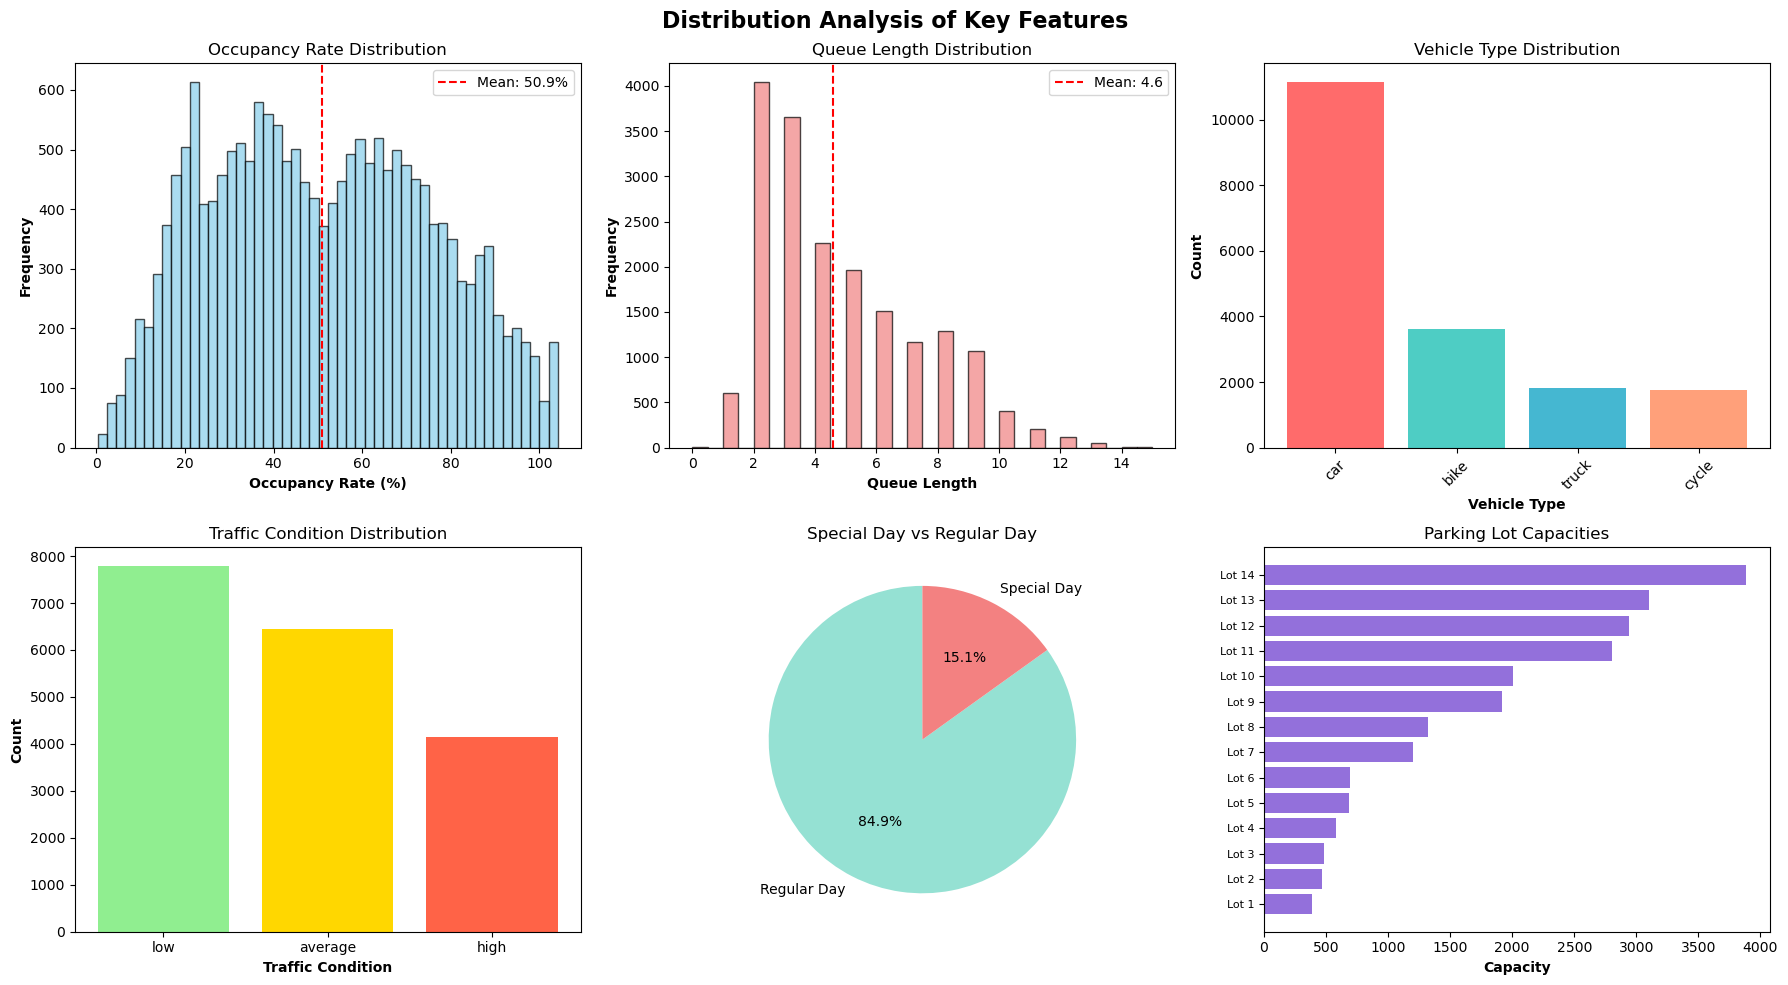

✓ Distribution Analysis plot saved


In [18]:
print("\n" + "="*70)
print("GENERATING VISUALIZATIONS")
print("="*70)




# Create figure directory for saving plots
import os
os.makedirs('figures', exist_ok=True)


#Figure 1: Distribution Analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribution Analysis of Key Features', fontsize=16, fontweight='bold')

# Occupancy Rate Distribution
axes[0, 0].hist(data['OccupancyRate'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Occupancy Rate (%)', fontweight='bold')
axes[0, 0].set_ylabel('Frequency', fontweight='bold')
axes[0, 0].set_title('Occupancy Rate Distribution')
axes[0, 0].axvline(data['OccupancyRate'].mean(), color='red', linestyle='--', 
                   label=f"Mean: {data['OccupancyRate'].mean():.1f}%")
axes[0, 0].legend()

# Queue Length Distribution
axes[0, 1].hist(data['QueueLength'], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
axes[0, 1].set_xlabel('Queue Length', fontweight='bold')
axes[0, 1].set_ylabel('Frequency', fontweight='bold')
axes[0, 1].set_title('Queue Length Distribution')
axes[0, 1].axvline(data['QueueLength'].mean(), color='red', linestyle='--',
                   label=f"Mean: {data['QueueLength'].mean():.1f}")
axes[0, 1].legend()

# Vehicle Type Distribution
vehicle_counts = data['VehicleType'].value_counts()
axes[0, 2].bar(vehicle_counts.index, vehicle_counts.values, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'])
axes[0, 2].set_xlabel('Vehicle Type', fontweight='bold')
axes[0, 2].set_ylabel('Count', fontweight='bold')
axes[0, 2].set_title('Vehicle Type Distribution')
axes[0, 2].tick_params(axis='x', rotation=45)

# Traffic Condition Distribution
traffic_counts = data['TrafficConditionNearby'].value_counts()
colors_traffic = ['#90EE90', '#FFD700', '#FF6347']
axes[1, 0].bar(traffic_counts.index, traffic_counts.values, color=colors_traffic)
axes[1, 0].set_xlabel('Traffic Condition', fontweight='bold')
axes[1, 0].set_ylabel('Count', fontweight='bold')
axes[1, 0].set_title('Traffic Condition Distribution')

# Special Day Distribution
special_day_counts = data['IsSpecialDay'].value_counts()
axes[1, 1].pie(special_day_counts.values, labels=['Regular Day', 'Special Day'], 
               autopct='%1.1f%%', colors=['#95E1D3', '#F38181'], startangle=90)
axes[1, 1].set_title('Special Day vs Regular Day')

# Capacity by Parking Lot
capacity_by_lot = data.groupby('SystemCodeNumber')['Capacity'].first().sort_values()
axes[1, 2].barh(range(len(capacity_by_lot)), capacity_by_lot.values, color='mediumpurple')
axes[1, 2].set_yticks(range(len(capacity_by_lot)))
axes[1, 2].set_yticklabels([f"Lot {i+1}" for i in range(len(capacity_by_lot))], fontsize=8)
axes[1, 2].set_xlabel('Capacity', fontweight='bold')
axes[1, 2].set_title('Parking Lot Capacities')

plt.tight_layout()
plt.savefig('figures/01_distribution_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Distribution Analysis plot saved")



GENERATING VISUALIZATIONS


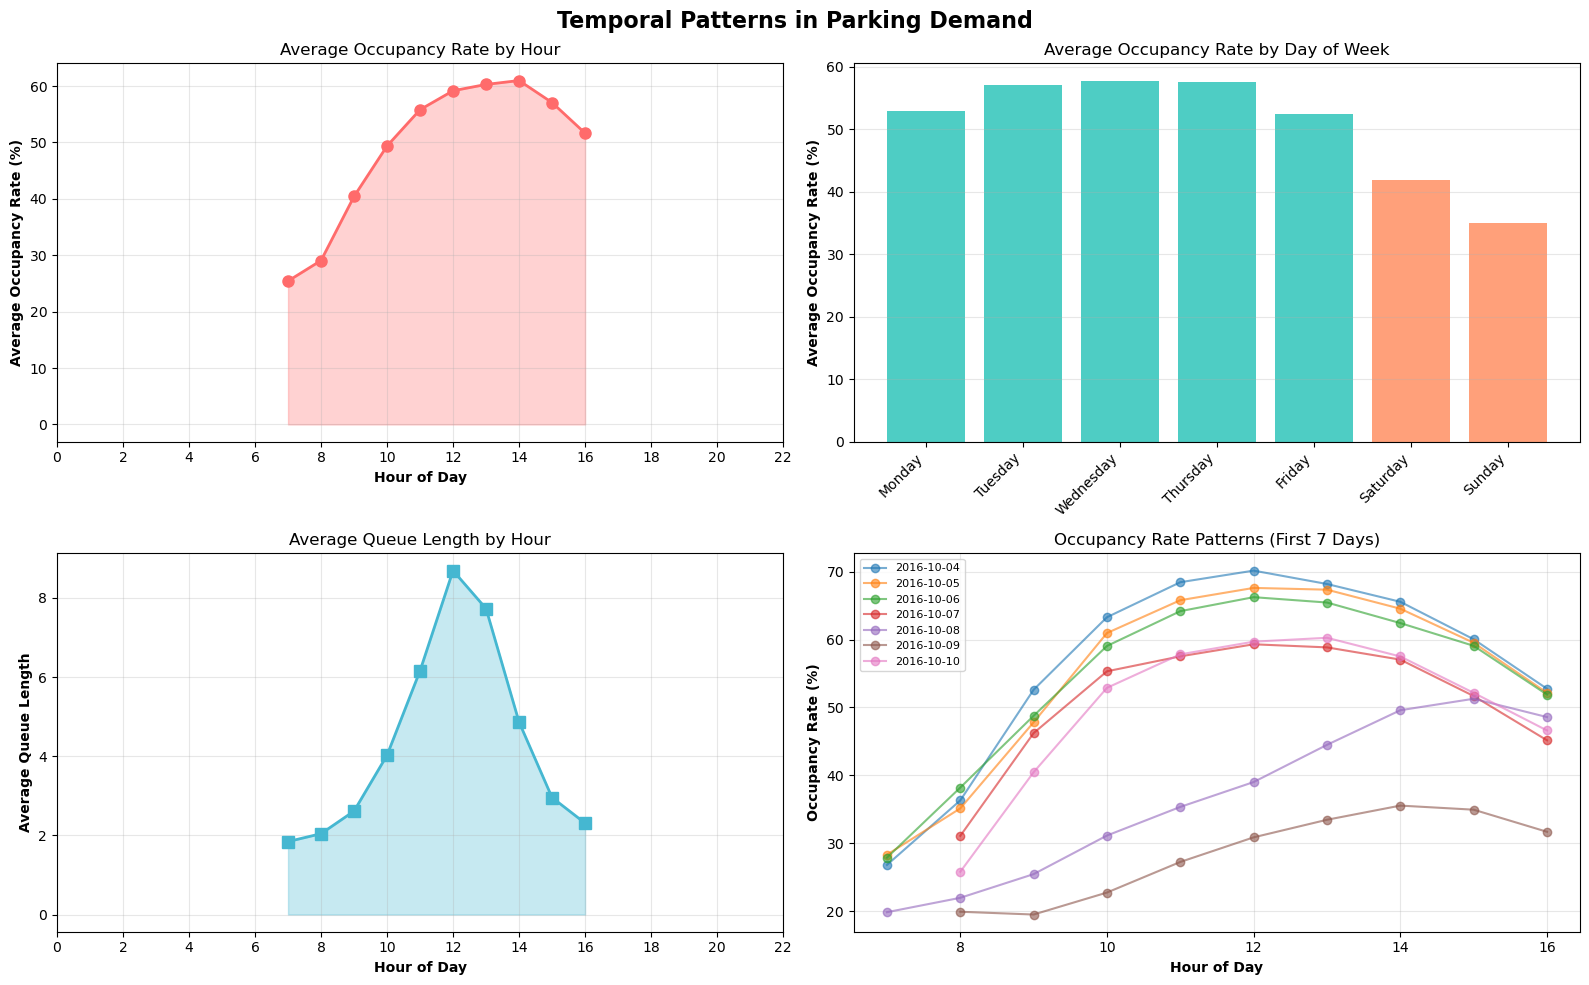

✓ Temporal Patterns plot saved


In [20]:
print("\n" + "="*70)
print("GENERATING VISUALIZATIONS")
print("="*70)




# Figure 2: Temporal Patterns

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Temporal Patterns in Parking Demand', fontsize=16, fontweight='bold')

# Hourly Occupancy Pattern
hourly_occupancy = data.groupby('Hour')['OccupancyRate'].mean()
axes[0, 0].plot(hourly_occupancy.index, hourly_occupancy.values, marker='o', 
                linewidth=2, markersize=8, color='#FF6B6B')
axes[0, 0].fill_between(hourly_occupancy.index, hourly_occupancy.values, alpha=0.3, color='#FF6B6B')
axes[0, 0].set_xlabel('Hour of Day', fontweight='bold')
axes[0, 0].set_ylabel('Average Occupancy Rate (%)', fontweight='bold')
axes[0, 0].set_title('Average Occupancy Rate by Hour')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_xticks(range(0, 24, 2))

# Day of Week Pattern
day_occupancy = data.groupby('DayName')['OccupancyRate'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
axes[0, 1].bar(range(len(day_occupancy)), day_occupancy.values, 
               color=['#4ECDC4' if x < 5 else '#FFA07A' for x in range(7)])
axes[0, 1].set_xticks(range(len(day_occupancy)))
axes[0, 1].set_xticklabels(day_occupancy.index, rotation=45, ha='right')
axes[0, 1].set_ylabel('Average Occupancy Rate (%)', fontweight='bold')
axes[0, 1].set_title('Average Occupancy Rate by Day of Week')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Queue Length by Hour
hourly_queue = data.groupby('Hour')['QueueLength'].mean()
axes[1, 0].plot(hourly_queue.index, hourly_queue.values, marker='s', 
                linewidth=2, markersize=8, color='#45B7D1')
axes[1, 0].fill_between(hourly_queue.index, hourly_queue.values, alpha=0.3, color='#45B7D1')
axes[1, 0].set_xlabel('Hour of Day', fontweight='bold')
axes[1, 0].set_ylabel('Average Queue Length', fontweight='bold')
axes[1, 0].set_title('Average Queue Length by Hour')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xticks(range(0, 24, 2))

# Occupancy Rate Over Time (Sample of days)
sample_days = data['Date'].unique()[:7]  # First 7 days
sample_data = data[data['Date'].isin(sample_days)]
for day in sample_days:
    day_data = sample_data[sample_data['Date'] == day].groupby('Hour')['OccupancyRate'].mean()
    axes[1, 1].plot(day_data.index, day_data.values, marker='o', alpha=0.6, label=str(day))
axes[1, 1].set_xlabel('Hour of Day', fontweight='bold')
axes[1, 1].set_ylabel('Occupancy Rate (%)', fontweight='bold')
axes[1, 1].set_title('Occupancy Rate Patterns (First 7 Days)')
axes[1, 1].legend(fontsize=8, loc='best')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('figures/02_temporal_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Temporal Patterns plot saved")



GENERATING VISUALIZATIONS


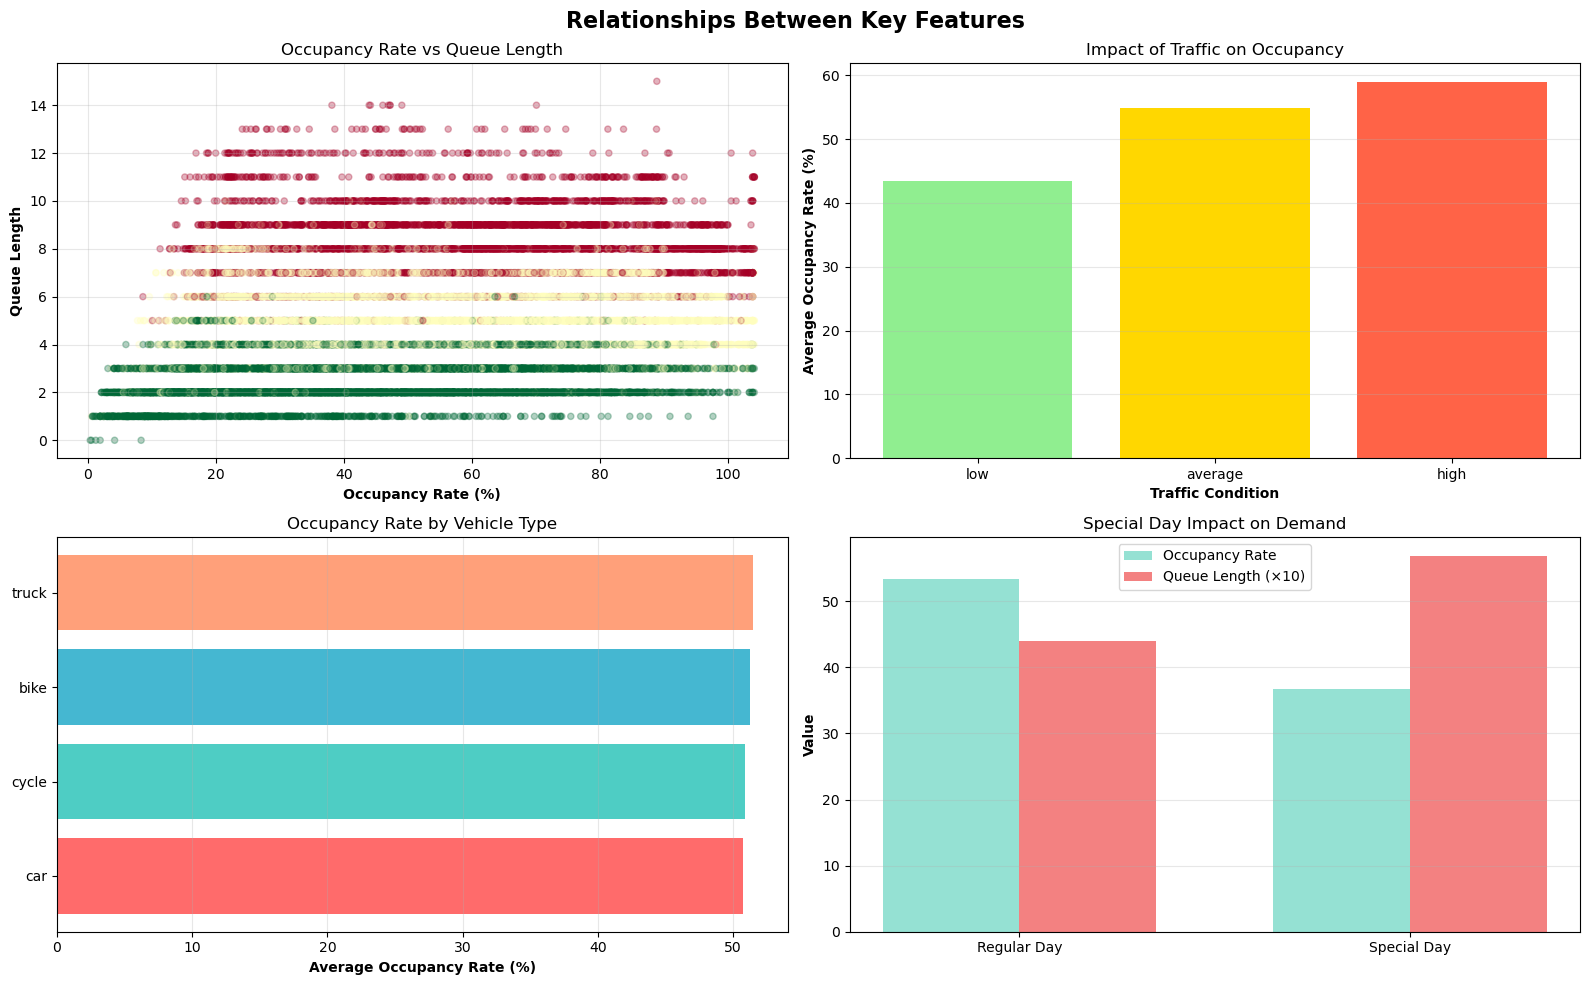

✓ Feature Relationships plot saved


In [21]:
print("\n" + "="*70)
print("GENERATING VISUALIZATIONS")
print("="*70)





# Figure 3: Feature Relationships

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Relationships Between Key Features', fontsize=16, fontweight='bold')

# Occupancy Rate vs Queue Length
axes[0, 0].scatter(data['OccupancyRate'], data['QueueLength'], 
                   alpha=0.3, c=data['TrafficLevel_Encoded'], cmap='RdYlGn_r', s=20)
axes[0, 0].set_xlabel('Occupancy Rate (%)', fontweight='bold')
axes[0, 0].set_ylabel('Queue Length', fontweight='bold')
axes[0, 0].set_title('Occupancy Rate vs Queue Length')
axes[0, 0].grid(True, alpha=0.3)

# Traffic Condition Impact on Occupancy
traffic_occupancy = data.groupby('TrafficConditionNearby')['OccupancyRate'].mean().reindex(['low', 'average', 'high'])
axes[0, 1].bar(traffic_occupancy.index, traffic_occupancy.values, 
               color=['#90EE90', '#FFD700', '#FF6347'])
axes[0, 1].set_xlabel('Traffic Condition', fontweight='bold')
axes[0, 1].set_ylabel('Average Occupancy Rate (%)', fontweight='bold')
axes[0, 1].set_title('Impact of Traffic on Occupancy')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Vehicle Type Impact
vehicle_occupancy = data.groupby('VehicleType')['OccupancyRate'].mean().sort_values()
axes[1, 0].barh(vehicle_occupancy.index, vehicle_occupancy.values, 
                color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A'])
axes[1, 0].set_xlabel('Average Occupancy Rate (%)', fontweight='bold')
axes[1, 0].set_title('Occupancy Rate by Vehicle Type')
axes[1, 0].grid(True, alpha=0.3, axis='x')

# Special Day Impact
special_comparison = data.groupby('IsSpecialDay').agg({
    'OccupancyRate': 'mean',
    'QueueLength': 'mean'
})
x = ['Regular Day', 'Special Day']
x_pos = np.arange(len(x))
width = 0.35

axes[1, 1].bar(x_pos - width/2, special_comparison['OccupancyRate'], width, 
               label='Occupancy Rate', color='#95E1D3')
axes[1, 1].bar(x_pos + width/2, special_comparison['QueueLength']*10, width, 
               label='Queue Length (×10)', color='#F38181')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(x)
axes[1, 1].set_ylabel('Value', fontweight='bold')
axes[1, 1].set_title('Special Day Impact on Demand')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('figures/03_feature_relationships.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Feature Relationships plot saved")



GENERATING VISUALIZATIONS


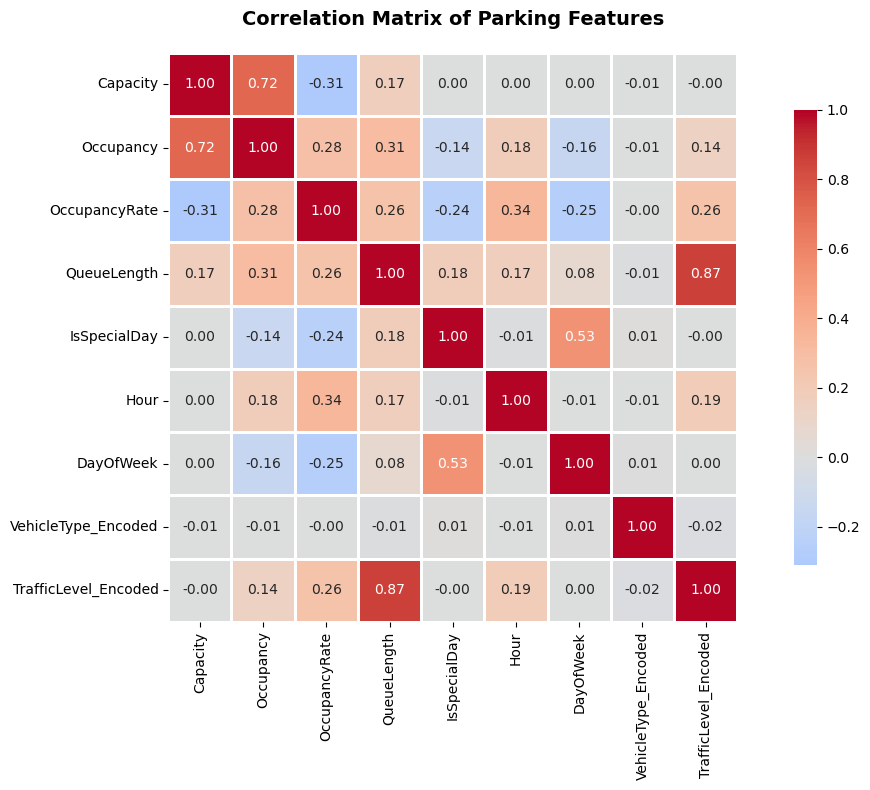

✓ Correlation Heatmap saved


In [22]:
print("\n" + "="*70)
print("GENERATING VISUALIZATIONS")
print("="*70)







# Figure 4: Correlation Heatmap

fig, ax = plt.subplots(figsize=(12, 8))

# Select numerical columns for correlation
corr_columns = ['Capacity', 'Occupancy', 'OccupancyRate', 'QueueLength', 
                'IsSpecialDay', 'Hour', 'DayOfWeek', 
                'VehicleType_Encoded', 'TrafficLevel_Encoded']

correlation_matrix = data[corr_columns].corr()

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            ax=ax)
ax.set_title('Correlation Matrix of Parking Features', fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.savefig('figures/04_correlation_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Correlation Heatmap saved")

# 6. KEY INSIGHTS SUMMARY

In [24]:
print("\n" + "="*70)
print("KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS")
print("="*70)

# Calculate key statistics
peak_hour = hourly_occupancy.idxmax()
peak_occupancy = hourly_occupancy.max()
lowest_hour = hourly_occupancy.idxmin()
lowest_occupancy = hourly_occupancy.min()

busiest_day = day_occupancy.idxmax()
quietest_day = day_occupancy.idxmin()

avg_queue_when_full = data[data['OccupancyRate'] > 90]['QueueLength'].mean()
avg_queue_overall = data['QueueLength'].mean()

print(f"\n Temporal Patterns:")
print(f"   • Peak Hour: {peak_hour}:00 with {peak_occupancy:.1f}% average occupancy")
print(f"   • Lowest Hour: {lowest_hour}:00 with {lowest_occupancy:.1f}% average occupancy")
print(f"   • Busiest Day: {busiest_day}")
print(f"   • Quietest Day: {quietest_day}")

print(f"\n Demand Indicators:")
print(f"   • Average Occupancy Rate: {data['OccupancyRate'].mean():.1f}%")
print(f"   • Average Queue Length: {avg_queue_overall:.2f} vehicles")
print(f"   • Queue Length when >90% full: {avg_queue_when_full:.2f} vehicles")
print(f"   • % of time with queues: {(data['QueueLength'] > 0).sum() / len(data) * 100:.1f}%")

print(f"\n Special Circumstances:")
print(f"   • Special Days: {data['IsSpecialDay'].sum()} records ({data['IsSpecialDay'].sum()/len(data)*100:.1f}%)")
print(f"   • High Traffic Conditions: {(data['TrafficConditionNearby']=='high').sum()} records")

print(f"\n Vehicle Mix:")
for vehicle_type in ['car', 'bike', 'truck', 'cycle']:
    count = (data['VehicleType'] == vehicle_type).sum()
    pct = count / len(data) * 100
    print(f"   • {vehicle_type.capitalize()}: {count} ({pct:.1f}%)")

print(f"\n Pricing Implications:")
print(f"   • Need dynamic pricing during peak hours ({peak_hour-2}:00 to {peak_hour+2}:00)")
print(f"   • Premium pricing when occupancy > 80% (happens {(data['OccupancyRate']>80).sum()} times)")
print(f"   • Queue-based surge pricing threshold: 5+ vehicles")
print(f"   • Special day multiplier should be implemented")



KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS

 Temporal Patterns:
   • Peak Hour: 14:00 with 61.0% average occupancy
   • Lowest Hour: 7:00 with 25.4% average occupancy
   • Busiest Day: Wednesday
   • Quietest Day: Sunday

 Demand Indicators:
   • Average Occupancy Rate: 50.9%
   • Average Queue Length: 4.59 vehicles
   • Queue Length when >90% full: 5.77 vehicles
   • % of time with queues: 100.0%

 Special Circumstances:
   • Special Days: 2772 records (15.1%)
   • High Traffic Conditions: 4137 records

 Vehicle Mix:
   • Car: 11166 (60.8%)
   • Bike: 3624 (19.7%)
   • Truck: 1809 (9.8%)
   • Cycle: 1769 (9.6%)

 Pricing Implications:
   • Need dynamic pricing during peak hours (12:00 to 16:00)
   • Premium pricing when occupancy > 80% (happens 2615 times)
   • Queue-based surge pricing threshold: 5+ vehicles
   • Special day multiplier should be implemented


# 7. SAVE PROCESSED DATA

In [26]:
# Save processed data for next notebooks
data.to_csv('processed_data.csv', index=False)
print(f"\n✓ Processed data saved to 'processed_data.csv'")

print("\n" + "="*70)
print("EDA COMPLETED SUCCESSFULLY!")


✓ Processed data saved to 'processed_data.csv'

EDA COMPLETED SUCCESSFULLY!
